<a href="https://colab.research.google.com/github/vine0alien/vgSales/blob/main/Vg_Sales_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
raw = 'https://raw.githubusercontent.com/vine0alien/vgSales/refs/heads/main/vgsales.csv'
vg_sales = pd.read_csv(raw)

vg_sales = vg_sales.dropna(subset=['Year'])
vg_sales['Year'] = vg_sales['Year'].astype(int)

In [ ]:
vg_sales['Total_sales'] = vg_sales['EU_Sales'] + vg_sales['JP_Sales']\
+ vg_sales['NA_Sales'] + vg_sales['Global_Sales'] + vg_sales['Other_Sales']

In [ ]:
best_sellers = vg_sales.groupby(['Name', 'Platform'])['Total_sales'].sum().reset_index().sort_values(by='Total_sales', ascending=False)

In [ ]:
frequency_years = vg_sales.groupby('Year')['Name'].count().reset_index().sort_values(by='Name', ascending=False)
frequency_years.columns = ['Year', 'Count']
frequency_years['Year2Digits'] = frequency_years['Year'].astype(str).str[-2:]
frequency_years = frequency_years.set_index('Year2Digits')
frequency_years = frequency_years.head(10)
frequency_years = frequency_years.sort_values(by='Year')

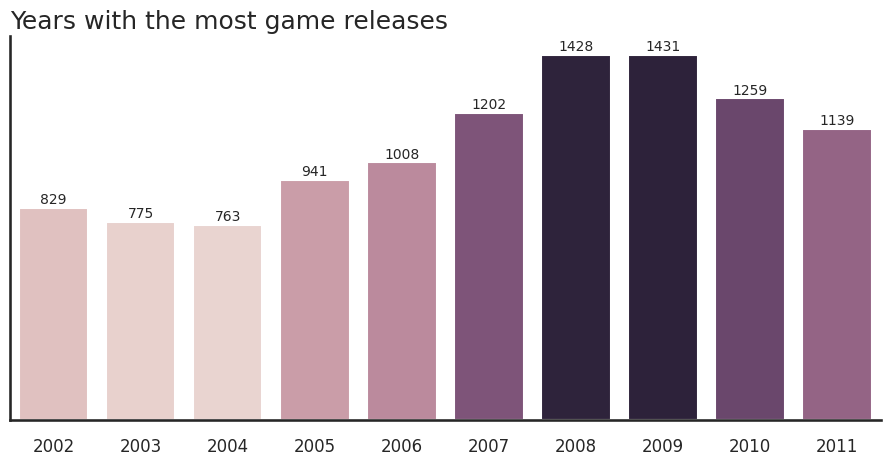

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
sns.set_theme(style='white', context="talk")

ax = sns.barplot(data=frequency_years, x='Year', y='Count', hue='Count')
ax.set_title('Years with the most game releases', loc='left')
ax.set_ylabel('')
ax.set_xlabel('')
ax.xaxis.set_tick_params(labelsize = 12)
plt.legend([],[], frameon=False)
plt.tight_layout()

sns.despine(right=True)

ax.set_yticklabels([])
for i, valor in enumerate(frequency_years['Count']):
    qtd = valor
    offset = 35
    ax.text(i, valor + offset, qtd, fontsize = 10, ha = "center", va="center")

In [ ]:
SalesYears = vg_sales.groupby('Year')['Total_sales'].sum().reset_index().sort_values(by='Total_sales', ascending=False)
SalesYears = SalesYears.head(10)
SalesYears = SalesYears.sort_values(by='Year')

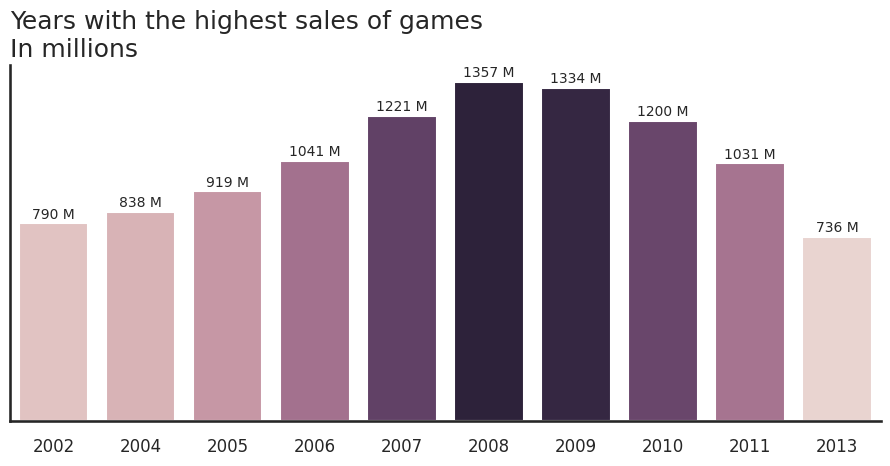

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
sns.set_theme(style='white',context="talk")

ax = sns.barplot(data=SalesYears, x='Year', y='Total_sales', hue='Total_sales')
plt.legend([],[], frameon=False)
ax.set_title('Years with the highest sales of games\nIn millions', loc='left')
ax.set_ylabel('')
ax.set_xlabel('')
ax.xaxis.set_tick_params(labelsize = 12)
plt.tight_layout()

sns.despine(right=True)

ax.set_yticklabels([])
for i, valor in enumerate(SalesYears['Total_sales']):
    offset = 35
    qtd = f'{int(valor)} M'
    ax.text(i, valor + offset, qtd, fontsize = 10, ha = "center", va="center")


In [ ]:
best_sellers = vg_sales.groupby(['Name'])['Total_sales'].sum().reset_index().sort_values(by='Total_sales', ascending=False)
best_sellers = best_sellers.head(10)

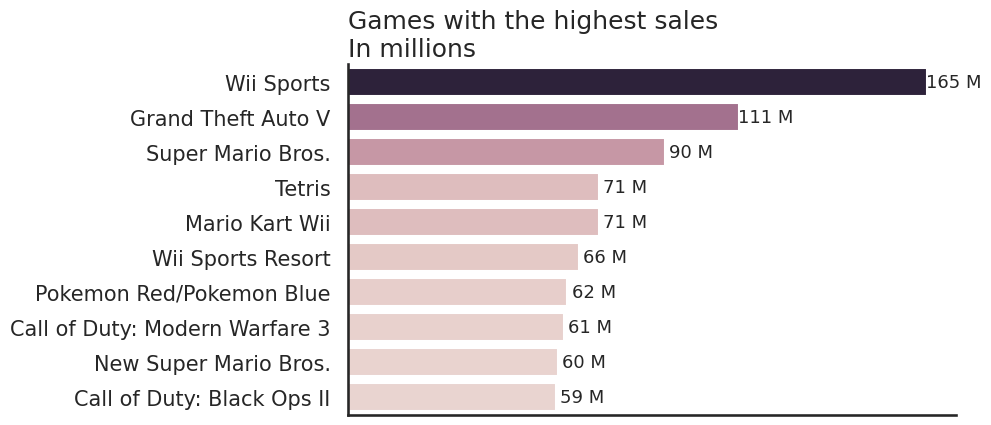

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
sns.set_theme(style='white',context="talk")

ax = sns.barplot(data=best_sellers, x='Total_sales', y='Name', hue='Total_sales')
ax.legend().remove()
ax.set_ylabel('')
ax.set_xlabel('')
ax.set_title('Games with the highest sales\nIn millions', loc='left')
ax.yaxis.set_tick_params(labelsize = 15)
plt.tight_layout()
sns.despine(right=True)

ax.set_xticklabels([])
for i, valor in enumerate(best_sellers['Total_sales']):
    offset = 7.5
    qtd = f'{int(valor)} M'
    ax.text(valor + offset, i, qtd, fontsize = 13, ha = "center", va="center")

In [ ]:
Platformgames = vg_sales.groupby('Platform')['Name'].count().reset_index().sort_values(by='Name', ascending=False)
Platformgames.columns = ['Platform', 'Games_count']
Platformgames = Platformgames.head(10).sort_values(by='Games_count', ascending=False)

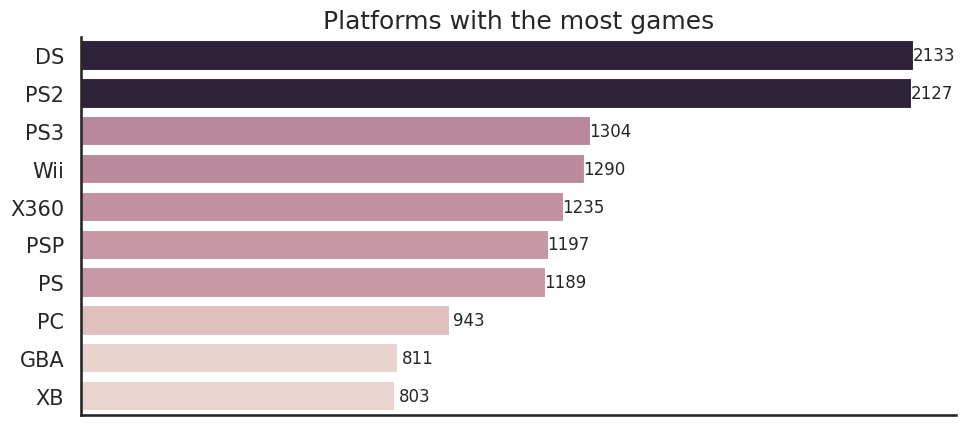

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
sns.set_style(style='white')

ax = sns.barplot(data=Platformgames, x='Games_count', y='Platform', hue='Games_count')
ax.legend().remove()
ax.set_ylabel('')
ax.set_xlabel('')
ax.set_title('Platforms with the most games')
ax.yaxis.set_tick_params(labelsize=15)
plt.tight_layout()
sns.despine(right=True)

ax.set_xticklabels([])
for i, valor in enumerate(Platformgames['Games_count']):
    offset = 50
    qtd = f'{int(valor)}'
    ax.text(valor + offset, i, qtd, fontsize = 12, ha = "center", va="center")
